In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
#time period
T = 100.0
dt = 0.02
N = int(T/dt)+1
t = numpy.linspace(0.0,T,num=N)

In [25]:
#initial condition
z0 = 100.0
b0 = 10.0
zt = 100.0
g = 9.81

u = numpy.array([z0,b0])

z = numpy.zeros(N)
z[0] = z0

In [30]:
for n in range(1,N):
    rhs = numpy.array([u[1], g * ( 1-u[0] / zt)])
    u = u + dt * rhs
    z[n] = u[0]

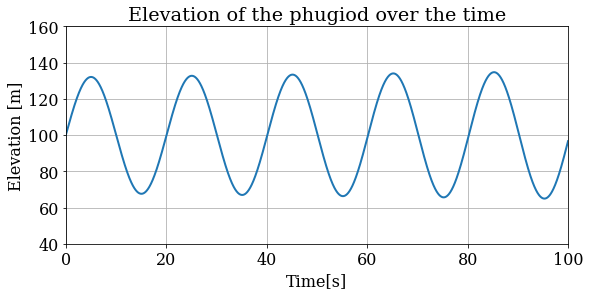

In [40]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

pyplot.figure(figsize=(9.0,4.0))
pyplot.title('Elevation of the phugiod over the time')
pyplot.xlabel('Time[s]')
pyplot.ylabel('Elevation [m]')
pyplot.xlim(t[0],t[-1])
pyplot.ylim(40.0,160.0)
pyplot.grid()
pyplot.plot(t, z, color = 'C0', linestyle = '-', linewidth=2);

In [49]:
z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5*t) 
+ (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)

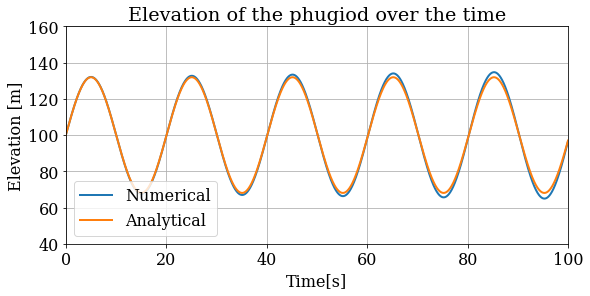

In [50]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

pyplot.figure(figsize=(9.0,4.0))
pyplot.title('Elevation of the phugiod over the time')
pyplot.xlabel('Time[s]')
pyplot.ylabel('Elevation [m]')
pyplot.xlim(t[0],t[-1])
pyplot.ylim(40,160)
pyplot.grid()
pyplot.plot(t, z, label = 'Numerical', color = 'C0', linestyle = '-', linewidth=2);
pyplot.plot(t, z_exact, label = 'Analytical', color = 'C1', linestyle = '-', linewidth=2);
pyplot.legend();

In [52]:
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]
z_values = []

for dt in dt_values:
    N = int(T / dt) + 1
    t = numpy.linspace(0.0, T, num=N)
    #initial condition
    u = numpy.array([z0,b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    for n in range(1,N):
        rhs = numpy.array([u[1],g * (1 - u[0] / zt)])
        u = u + rhs*dt
        z[n] = u[0]
    z_values.append(z)    

In [54]:
def l1_error(z, z_exact, dt):
    error = dt * numpy.sum(numpy.abs(z-z_exact))
    return error

In [56]:
 error_values= []
    
for z, dt in zip(z_values, dt_values):
    N = int(T / dt) + 1
    t = numpy.linspace(0.0, T, num = N)
    z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5*t) 
               + (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt) 
    error_values.append(l1_error(z, z_exact, dt))

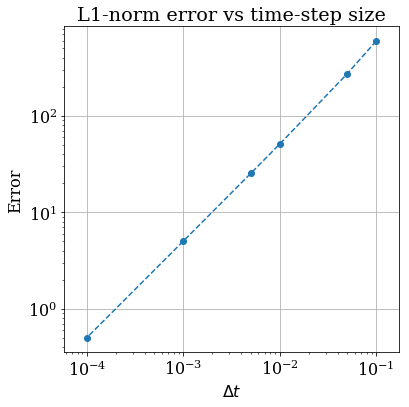

In [59]:
pyplot.figure(figsize=(6.0,6.0))
pyplot.title('L1-norm error vs time-step size')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('Error')
pyplot.grid()
pyplot.loglog(dt_values, error_values, color = 'C0', linestyle = '--', marker='o')
pyplot.axis('equal');